In [ ]:
#packages
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import random

In [ ]:
#1-dataset
x,y=make_regression(n_samples=100,n_features=1,noise=10)
#visualiser
plt.scatter(x[:,0],y)


In [ ]:
#verifier la dim
print(x.shape)
#y anormal
y=y.reshape(y.shape[0],1)
print(y.shape)

In [116]:
#matrice
#coler des 1 a x pour X
#ajoueter x**2
X=np.hstack((x,np.ones((x.shape[0],1))))
X

array([[-2.35781571e+00,  1.00000000e+00],
       [-2.50344706e+00,  1.00000000e+00],
       [ 1.55600488e-01,  1.00000000e+00],
       [-7.40963041e-01,  1.00000000e+00],
       [ 1.66928368e-01,  1.00000000e+00],
       [-2.22528840e+00,  1.00000000e+00],
       [ 4.37602052e-01,  1.00000000e+00],
       [ 5.46260436e-01,  1.00000000e+00],
       [-9.94526790e-01,  1.00000000e+00],
       [-4.14162323e-01,  1.00000000e+00],
       [ 2.00235753e+00,  1.00000000e+00],
       [ 3.26052865e-02,  1.00000000e+00],
       [-1.01215907e+00,  1.00000000e+00],
       [-5.24510684e-01,  1.00000000e+00],
       [-1.44145195e-01,  1.00000000e+00],
       [ 4.14056023e-01,  1.00000000e+00],
       [ 6.78429558e-01,  1.00000000e+00],
       [ 1.74997026e-01,  1.00000000e+00],
       [-4.71086333e-01,  1.00000000e+00],
       [-2.06534129e-01,  1.00000000e+00],
       [-1.48774254e+00,  1.00000000e+00],
       [-4.65567577e-01,  1.00000000e+00],
       [-6.71320921e-01,  1.00000000e+00],
       [ 7.

In [117]:
#initialiser les coefficients de manière aléatoires
theta=np.random.randn(2,1)*20
theta


array([[ 4.05720067],
       [16.15422649]])

In [118]:
from sklearn.linear_model import LinearRegression
h=LinearRegression()
h.fit(X,y)
h.coef_

#h.predict(X)


array([[64.34986476,  0.        ]])

In [119]:
def model(x,theta):
    
    return x.dot(theta)
    

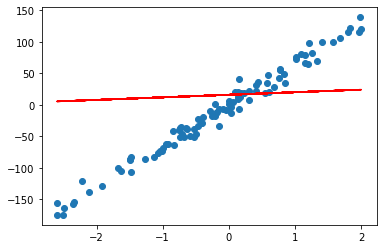

In [120]:
#test
plt.plot(x,model(X,theta),"r")
plt.scatter(x[:,0],y)

In [121]:
#fonction cout

In [122]:
def cost_fct(x,y,theta):
    m=len(y)
    return 1/(2*m)* np.sum((model(x,theta)-y)**2)

In [123]:
cost_fct(X,y,theta)

2615.978739133084

In [124]:
#solution satistifaisante
def coef_deter(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

def satisfaisante(y,pred):
    if(coef_deter(y,pred)<=1 and coef_deter(y,pred)>=0.5):
        return 1
    else:
        return 0

In [125]:

np.random.randn(2,)*50

array([ 54.61620478, -31.79636309])

In [126]:
class Individu:
     def __init__(self, solution):
        self.solution = solution
        self.fitness_value = 0
    
     def __str__(self):
        return "solution"+self.solution
        

In [127]:
#generate individu
def gen_ind():
    ind=Individu(np.random.randn(2,1)*50)
    return ind


In [128]:
#generate population
def gen_pop(m):
    return [gen_ind() for _ in range(m)]


In [129]:
#selection par tournoi
def selection(pop,taille):
    best=pop[random.randint(0,len(pop)-1)]
    for i in range (taille):
        nextp=pop[random.randint(0,len(pop)-1)]
        if(cost_fct(x,y,best.solution)>cost_fct(x,y,nextp.solution)):
            best=nextp
    return best

In [130]:
#cross over
def cross_over(ind1,ind2):
    c=random.randint(0,len(ind1.solution)-1)
    for i in range(c):
        temp=ind1.solution[i,0]
        ind1.solution[i,0]=ind2.solution[i,0]
        ind2.solution[i,0]=temp
    return ind1,ind2
    
    
    

In [131]:
#mutation
def mutation(ind,proba):
    for i in range(len(ind)-1):
        if(random.random()<proba):
            ind[i]=1-ind[i]
    return ind

In [132]:
def genetic_algo(x,y,theta,popsize,n,n_max):
    best=theta
    n_iterations=0
    #pop initial
    pop=gen_pop(popsize)
    Q=[]
    while( satisfaisante(y,model(x,best))==False ):
        n_iterations+=1
        if(n_iterations>n_max):
            break
        for ind in pop:
            ind.fitness_value=cost_fct(x,y,ind.solution)
        #trier
            
        pop.sort(key=lambda x: x.fitness_value)
            
        if(  cost_fct(x,y,pop[0].solution)< cost_fct(x,y,best)):
            best=pop[0].solution
            print("///")
            print(best)
        #selection des n meilleurs parents 
        Q=pop[:n]
        
       
        #cross over
        
        for i in range(int((len(pop)-n)/2)):
            pa=selection(pop,2)
            pb=selection(pop,2)
            ind1,ind2=cross_over(pa,pb)
            Q.append(ind1)
            Q.append(ind2)
 

            
        P=Q
    return best
    
            
        
        
            
        
            
            
        
        
        
        
        
    
    
    

In [ ]:
#ML produire theta
best=genetic_algo(X,y,theta,1000000,500,10)
print("ok")
print(best)


In [361]:
theta_final=best
theta_final

array([[ 73.48632349],
       [-14.82975074]])

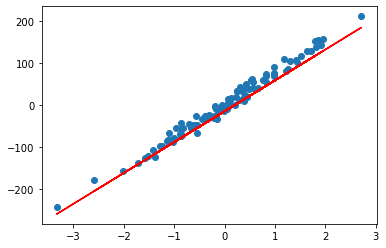

In [362]:
#test
plt.plot(x,model(X,theta_final),"r")
plt.scatter(x[:,0],y)

In [113]:
#performance avec coeeficient de determination

In [60]:
def coef_deter(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [63]:
coef_deter(y,model(X,theta_final))

NameError: name 'theta_final' is not defined